In [1]:
#script for finding the distribution of which DAU / DET the triggers fall into

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

print(os.getcwd())
%run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
%run /Users/andreas/phys/master/GRB/src/read_matlab_file.ipynb
%run /Users/andreas/phys/master/GRB/src/ASIMXspec.ipynb
%matplotlib inline

/Users/andreas/phys/master/GRB/src

All MAC paths are set!

All MAC paths are set!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None


read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for

convert_erg.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None


convert_erg.ipynb loaded successfully!
safety_time.ipynb loaded successfully!
LC_calibration loaded successfully!


/Users/andreas/miniforge3/lib/python3.9/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")


In [154]:
T0 = datetime.fromisoformat('2019-03-05T13:05:19.816')
df = harvest_data(fn='2019_3_5_13_3_48',T0='2019-03-05T13:05:19.816')
df.sort_values(by=['adr','tus'],inplace=True)
df.head()

dau/det starting from index 1
tus array given in seconds
df sorted by tus


,year,month,day,hour,minute,second,erg,dau,det,datetime,tus,adr
13,2019,3,5,13,3,47.525428,28,1,1,2019-03-05 13:03:47.525427861,-92.290572,1
15,2019,3,5,13,3,47.525878,43,1,1,2019-03-05 13:03:47.525877778,-92.290122,1
30,2019,3,5,13,3,47.530015,52,1,1,2019-03-05 13:03:47.530014972,-92.285985,1
38,2019,3,5,13,3,47.53014,408,1,1,2019-03-05 13:03:47.530140111,-92.285860,1
65,2019,3,5,13,3,47.537834,1768,1,1,2019-03-05 13:03:47.537834472,-92.278166,1


In [155]:
#convert energy_ch to keV

keV,cal_abc = convert_erg(df['erg'].to_numpy(),df['dau'].to_numpy(),df['det'].to_numpy(),T0)
print(min(keV),' keV' ,round(max(keV)/1e3,2),' MeV ')
df['keV'] = keV

49.5092  keV 44.17  MeV 


In [156]:
dau,det,tus = df['dau'].to_numpy(),df['det'].to_numpy(),df['tus'].to_numpy()
print('lengths:')
print(len(dau),len(det),len(tus))

lengths:
21914 21914 21914


tus array OK ...


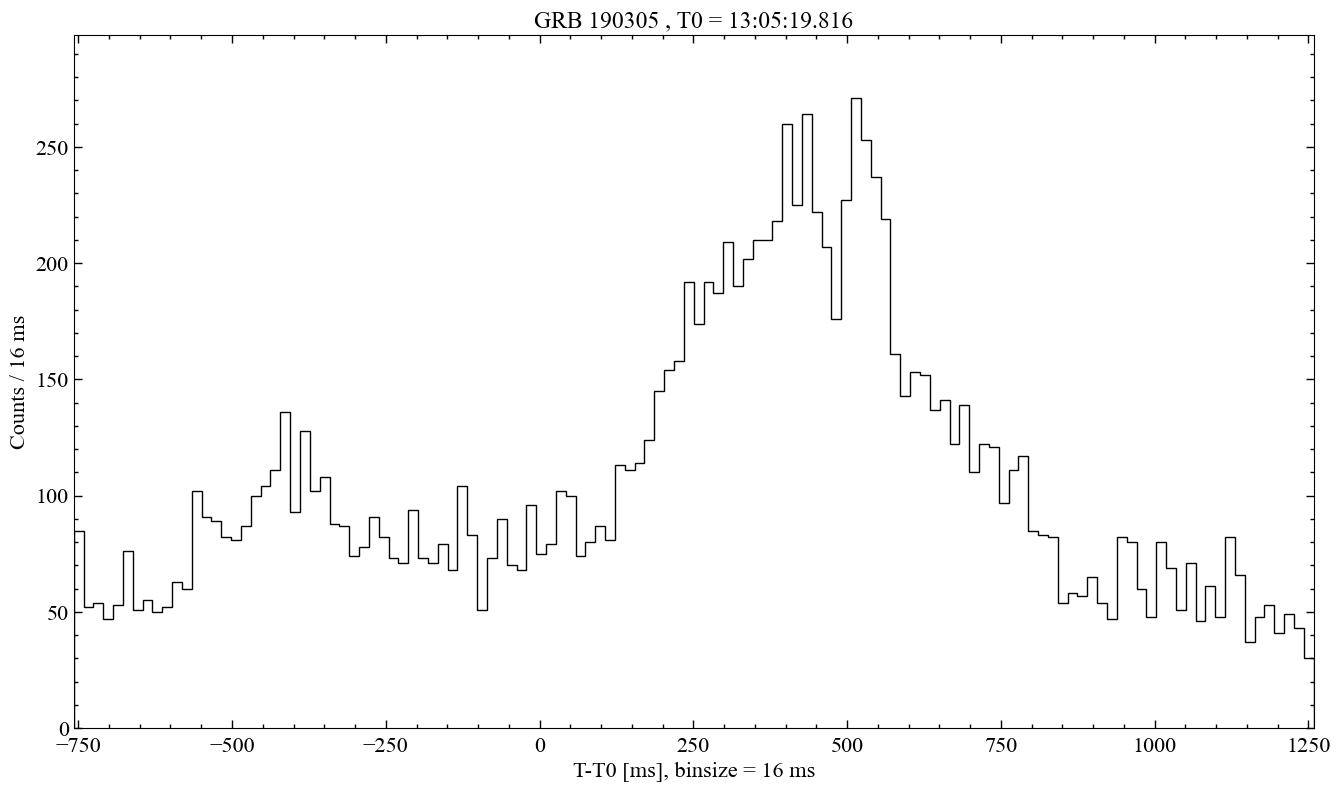

In [207]:
df.sort_values(by='tus',inplace=True)
tus = df['tus'].to_numpy()
i=find_nearest(tus,-2)
plot_HED(tus_arr=tus[i:]*1e6,binsize=16,T0=T0)

# HEAT MAP
    implement the following heatmaps:
    ----------
    1) static heatmap of dau
    2) static heatmap of dau & det
    3) dynamic heatmap of dau & det

In [5]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [157]:
df.sort_values(by='tus',inplace=True)
tus,keV,adr,tus,dau,det = df['tus'].to_numpy(),df['keV'].to_numpy(),df['adr'].to_numpy(),df['tus'].to_numpy(),df['dau'].to_numpy(),df['det'].to_numpy()

In [158]:
df.head(10)

,year,month,day,hour,minute,second,erg,dau,det,datetime,tus,adr,keV
0,2019,3,5,13,3,47.521628,1397,2,3,2019-03-05 13:03:47.521628443,-92.294372,6,22375.693085
1,2019,3,5,13,3,47.522101,84,2,3,2019-03-05 13:03:47.522100556,-92.293899,6,789.375670
2,2019,3,5,13,3,47.522307,39,2,2,2019-03-05 13:03:47.522307082,-92.293693,5,462.694706
3,2019,3,5,13,3,47.522423,28,1,2,2019-03-05 13:03:47.522422528,-92.293577,2,510.968696
4,2019,3,5,13,3,47.522521,36,2,2,2019-03-05 13:03:47.522520889,-92.293479,5,429.848156
5,2019,3,5,13,3,47.523758,22,1,3,2019-03-05 13:03:47.523757610,-92.292242,3,253.977552
6,2019,3,5,13,3,47.524072,120,2,2,2019-03-05 13:03:47.524071889,-92.291928,5,1382.115500
7,2019,3,5,13,3,47.524165,157,1,3,2019-03-05 13:03:47.524165167,-92.291835,3,1583.657622
8,2019,3,5,13,3,47.524165,1184,3,1,2019-03-05 13:03:47.524165193,-92.291835,7,22936.888708
9,2019,3,5,13,3,47.524165,74,2,1,2019-03-05 13:03:47.524165250,-92.291835,4,518.702168


## static dist plot

In [131]:
def get_dist(tus=None,adr=None,keV=None):
    total_energy_deposited = {'adr 1':0,'adr 2':0,'adr 3':0,'adr 4':0,'adr 5':0,'adr 6':0,'adr 7':0,'adr 8':0,'adr 9':0,'adr 10':0,'adr 11':0,'adr 12':0}
    #i_start,i_end = (find_nearest(tus,time_interval[0]),find_nearest(tus,time_interval[1])+1)
    for i in np.arange(0,len(tus)):
        total_energy_deposited[f'adr {adr[i]}'] += np.round(keV[i],3)
    return total_energy_deposited

In [138]:
def get_counts(df):
    df.sort_values(by='tus',inplace=True)
    tus = df['tus'].to_numpy()
    keV = df['keV'].to_numpy()
    adr= df['adr'].to_numpy()
    dau= df['dau'].to_numpy(),
    det = df['det'].to_numpy()

    i,j = find_nearest(tus,0.768),find_nearest(tus,1.28)
    dist = get_dist(tus=tus[i:j],adr=adr[i:j],keV=keV[i:j])
    return np.fromiter(dist.values(),float).reshape(4,3)/1e3

In [145]:
def plot_dist(integraded_counts):
    dau_labels, det_labels = ['dau 1','dau 2','dau 3', 'dau 4'], ['det 1','det 2','det 3']
    fig, ax = plt.subplots()
    im, cbar = heatmap(integraded_counts, row_labels=dau_labels, col_labels=det_labels,# ax=ax,
                       cmap="hot", cbarlabel="Total MeV")
    #each tile should show have the total amount of keV which is absorbed in the detector given a specific time or bin
    for i in range(len(dau_labels)):
        for j in range(len(det_labels)):
            text = ax.text(j, i, np.round(integraded_counts[i, j],2),
                           ha="center", va="center", color="black")
    plt.show()

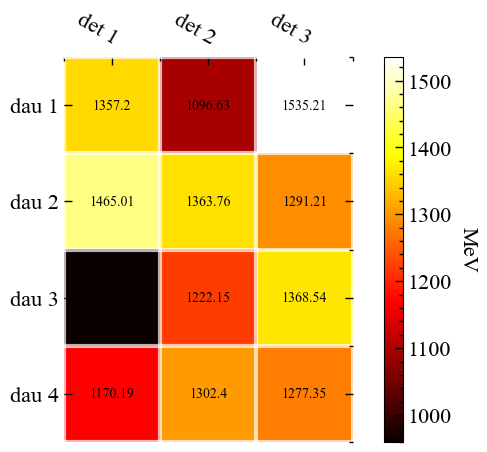

In [144]:
integraded_counts = get_counts(df)
plot_dist(integraded_counts)

## dynamic dist plot
    pass in the tus array to get the distribution for the give i,j index range
    for each ~20ms use the function get_counts for time rannge

In [146]:
dt = 0.020 #20 ms

In [160]:
i = find_nearest(tus,-2)
tus[i:]

array([-0.75740672, -0.75724131, -0.75724117, ...,  1.25103303,
        1.25103322,  1.25123192])

In [209]:
2/10

0.2

In [212]:
dt = 0.032 #20 ms
bins_animation = np.arange(tus[0],tus[-1]+dt,dt)
bin_lo = bins_animation[:-1]
bin_hi = bins_animation[1:]

tus = df['tus'].to_numpy()
i = find_nearest(tus,-2)
tus = tus[i:]

keV = df['keV'].to_numpy()[i:]
adr = df['adr'].to_numpy()[i:]
dau = df['dau'].to_numpy()[i:]
det = df['det'].to_numpy()[i:]

counts_in_bin = []
for i in np.arange(0,len(bin_lo)):
    start,end =find_nearest(tus,bin_lo[i]),find_nearest(tus,bin_hi[i])
    dist = get_dist(tus=tus[start:end],adr=adr[start:end],keV=keV[start:end])
    counts = np.fromiter(dist.values(),float).reshape(4,3)/1e3
    print('Max MeV', np.max(counts))
    counts_in_bin.append(counts)

Max MeV 174.543515
Max MeV 108.886595
Max MeV 188.45915900000003
Max MeV 106.57813
Max MeV 158.292112
Max MeV 108.73006199999999
Max MeV 173.14187400000003
Max MeV 154.83695099999997
Max MeV 115.35853399999998
Max MeV 211.499936
Max MeV 181.083383
Max MeV 226.18633499999999
Max MeV 155.351964
Max MeV 95.962015
Max MeV 88.121791
Max MeV 220.49922799999996
Max MeV 103.241355
Max MeV 166.790086
Max MeV 118.86714899999998
Max MeV 254.05275199999994
Max MeV 90.19840600000002
Max MeV 153.979603
Max MeV 120.523199
Max MeV 147.96946899999998
Max MeV 116.837205
Max MeV 127.28049899999998
Max MeV 69.378445
Max MeV 129.75388800000002
Max MeV 161.659695
Max MeV 100.79016
Max MeV 133.74810600000004
Max MeV 279.27321299999994
Max MeV 140.70859699999997
Max MeV 168.314791
Max MeV 178.38935599999996
Max MeV 95.10368700000001
Max MeV 127.10189600000002
Max MeV 207.031182
Max MeV 114.52744699999998
Max MeV 150.34026900000006
Max MeV 188.5076399999999
Max MeV 169.197592
Max MeV 116.82749399999999
Max MeV

In [ ]:
#run some kind of categoring algorithm on the generated dataset

In [214]:
#run a machine learning algorithm for detecting a burst
#how is the dynamic for the distribution between the GRB's?
#is there a pattern?


#get statistics of which detector triggered the most, which detector absorbed the most energy -and the least

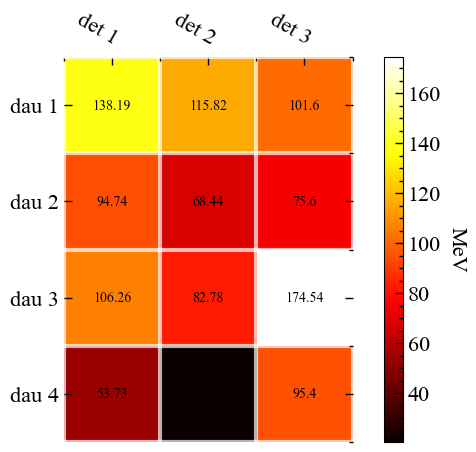

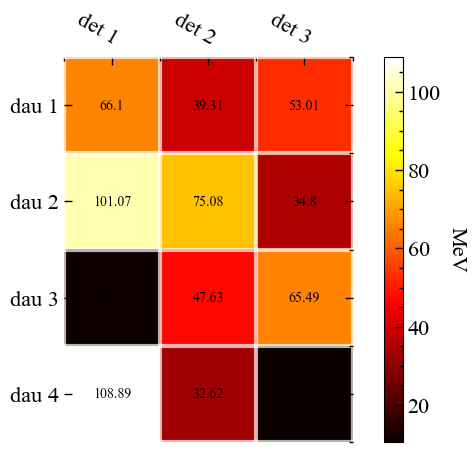

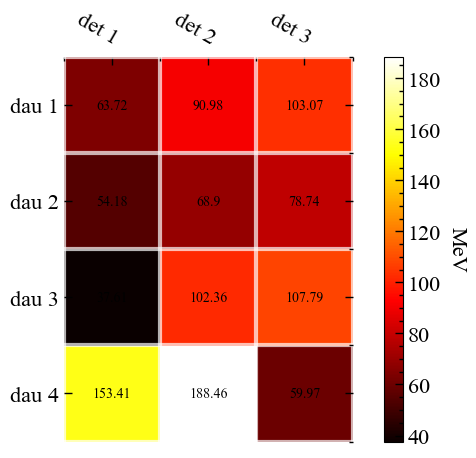

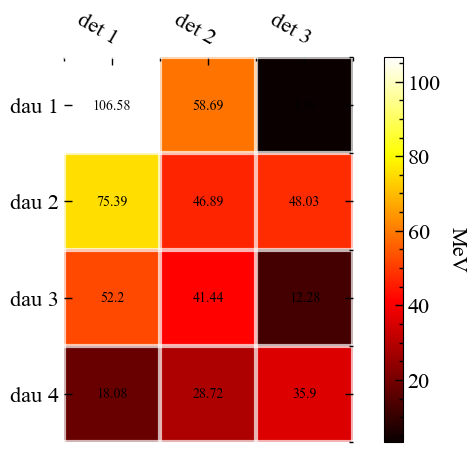

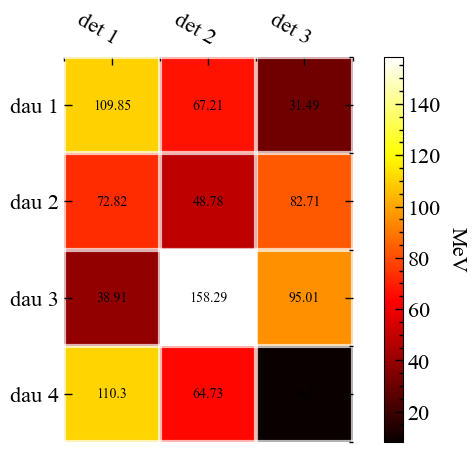

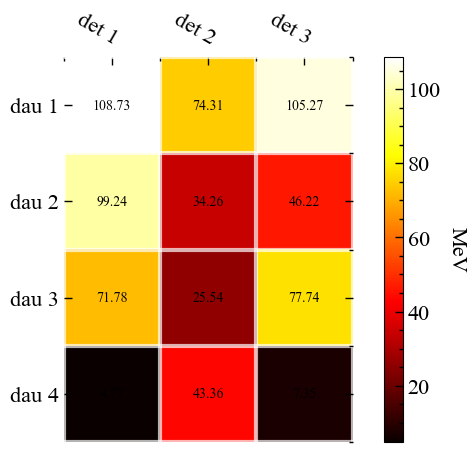

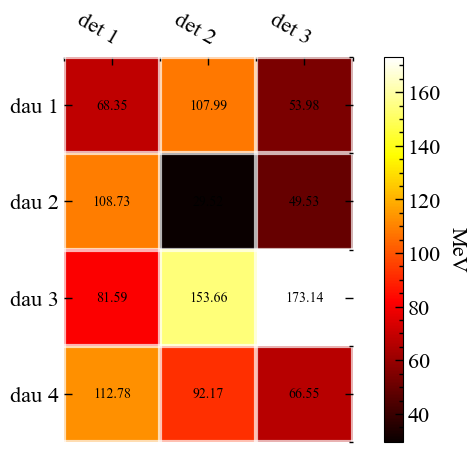

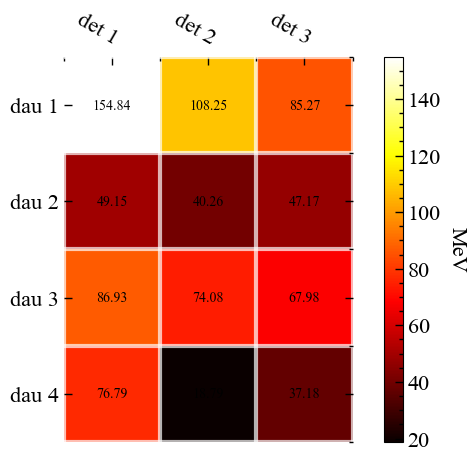

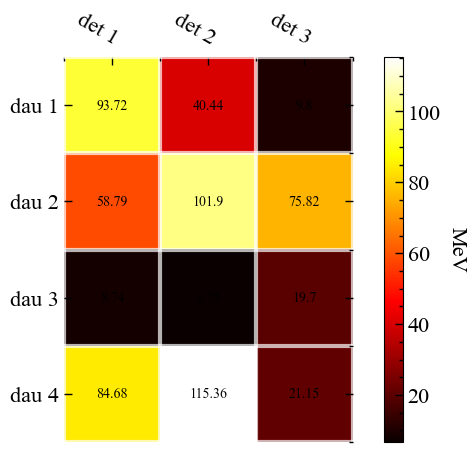

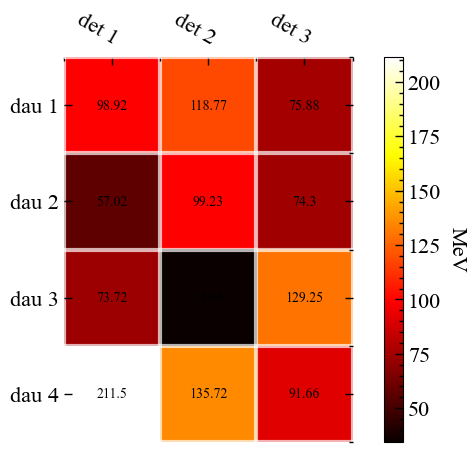

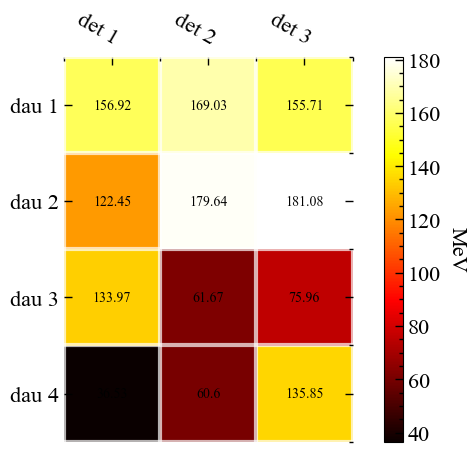

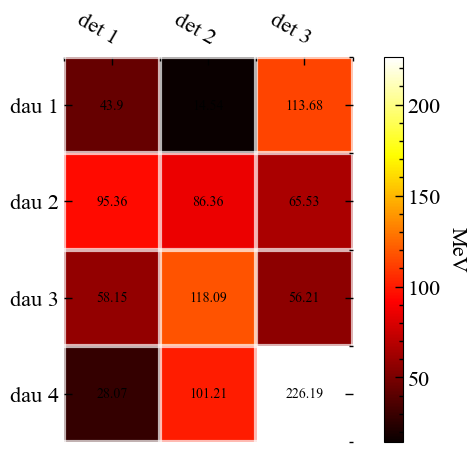

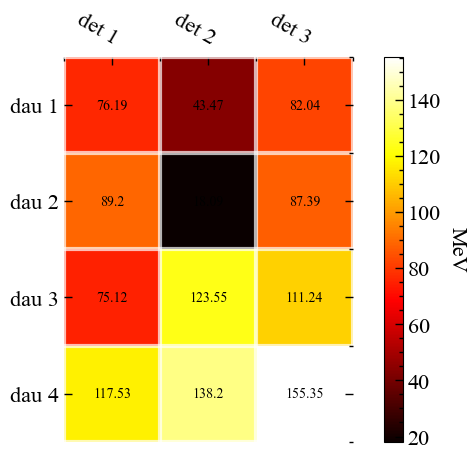

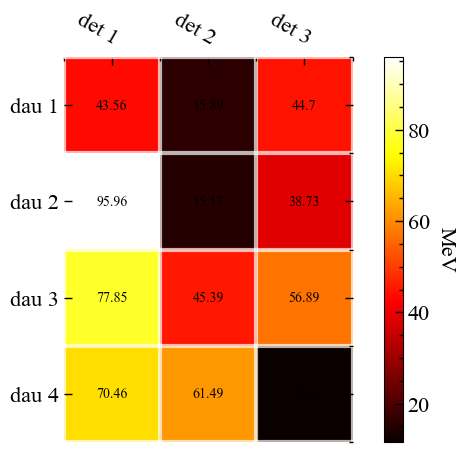

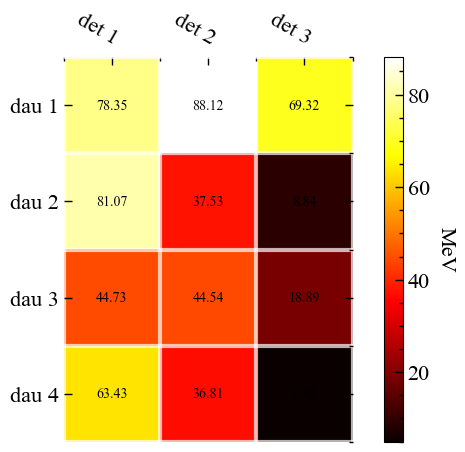

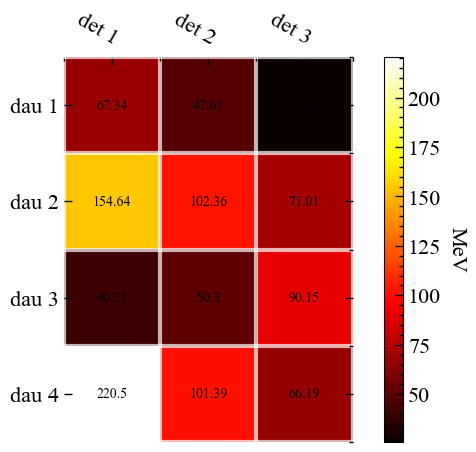

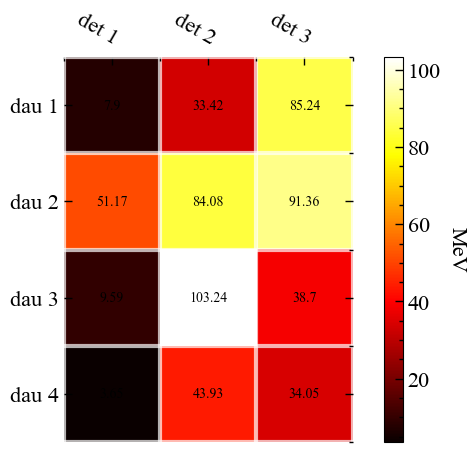

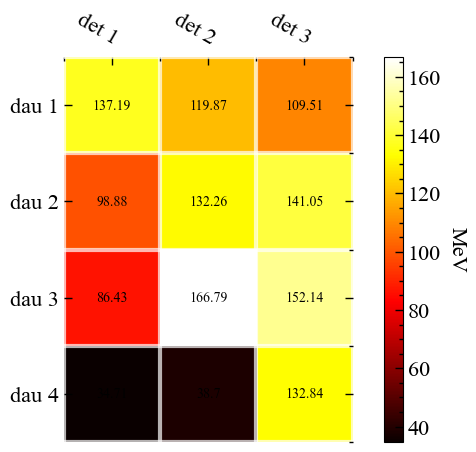

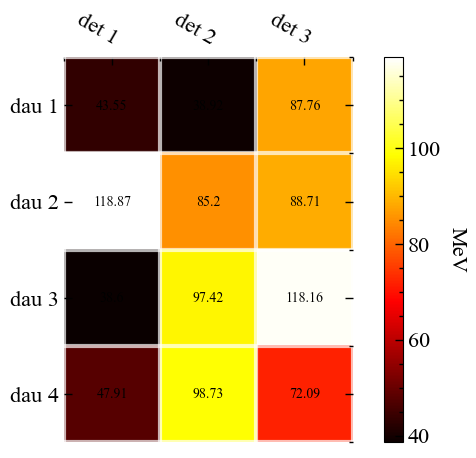

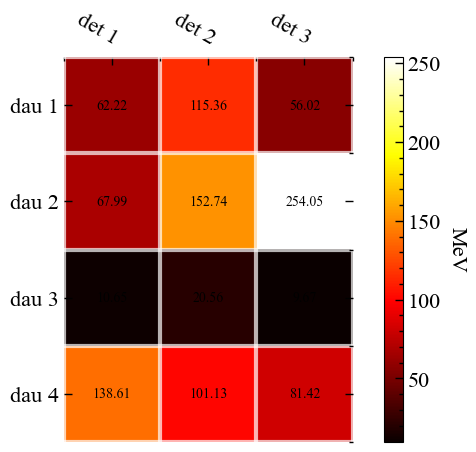

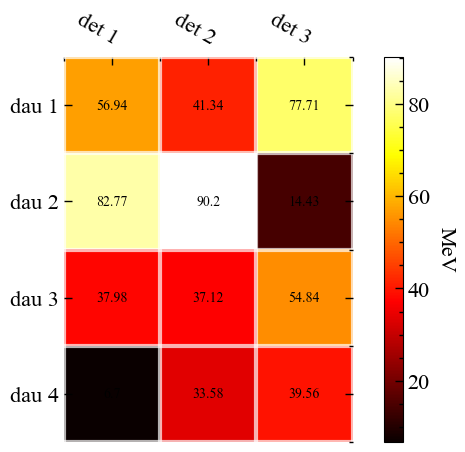

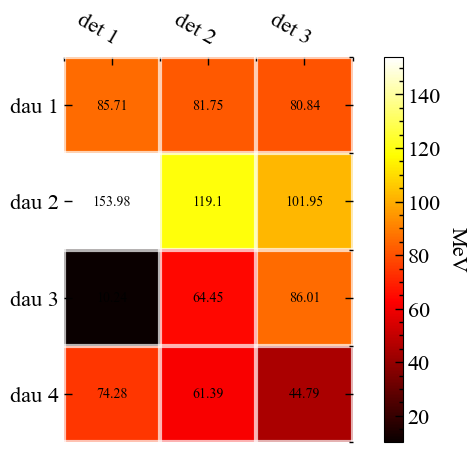

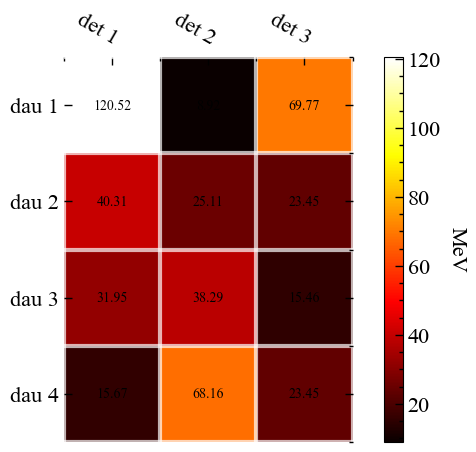

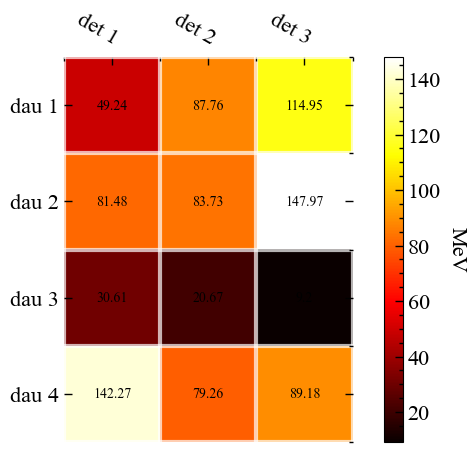

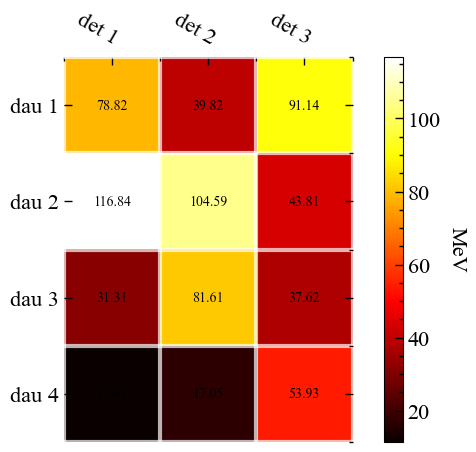

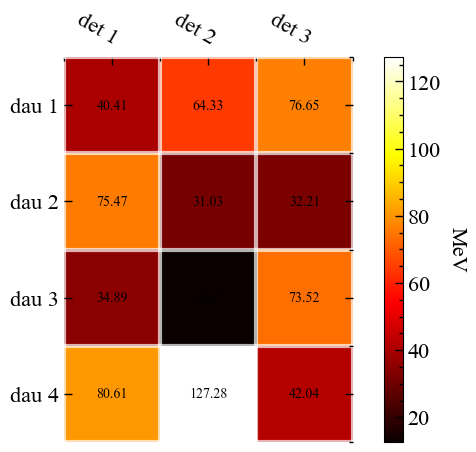

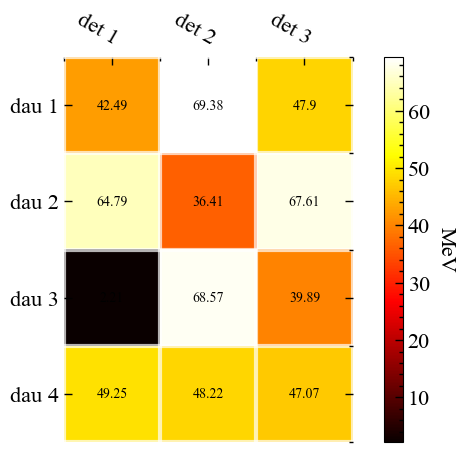

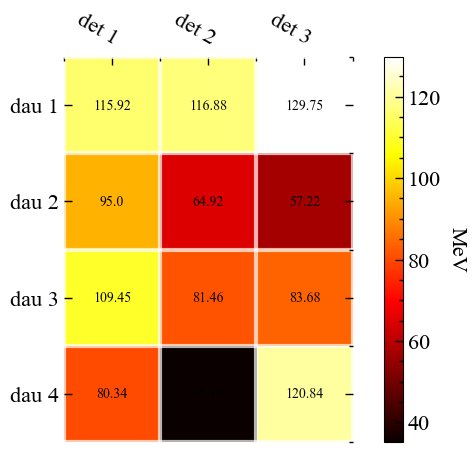

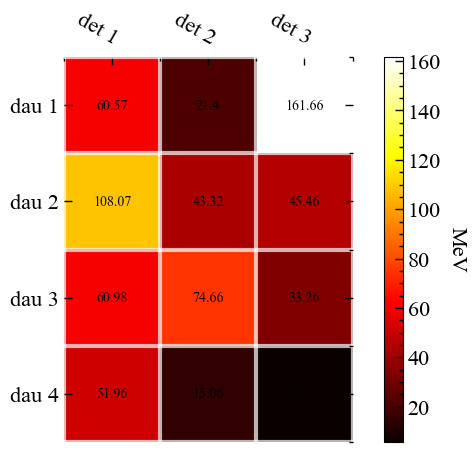

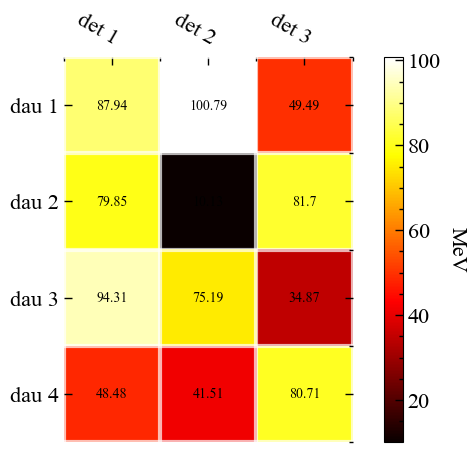

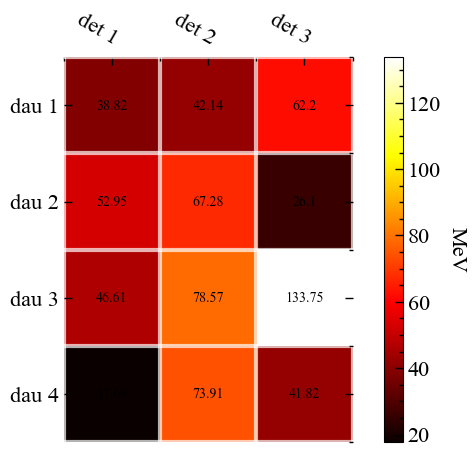

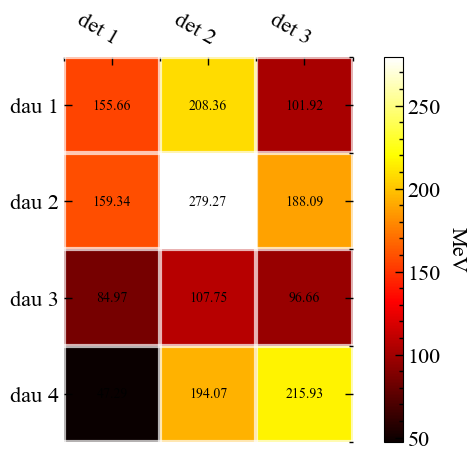

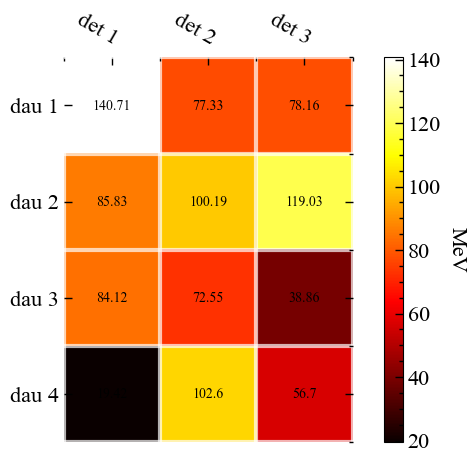

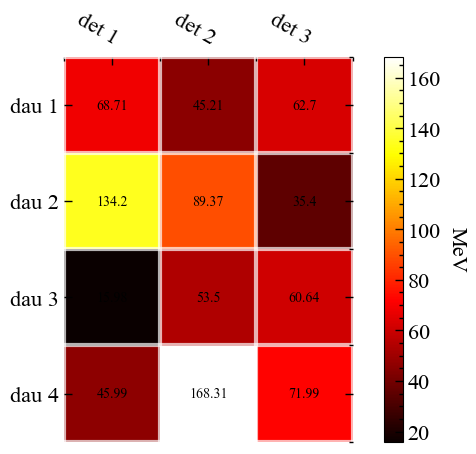

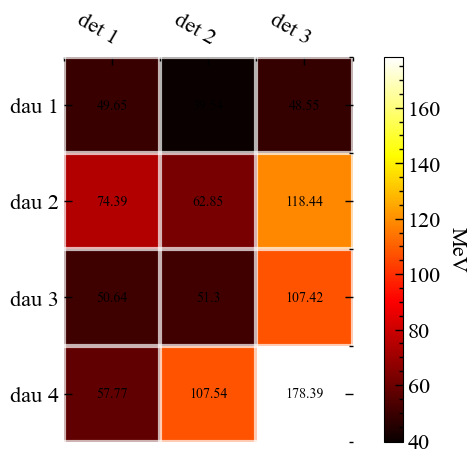

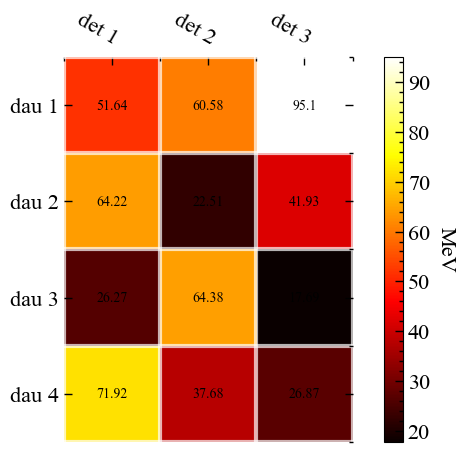

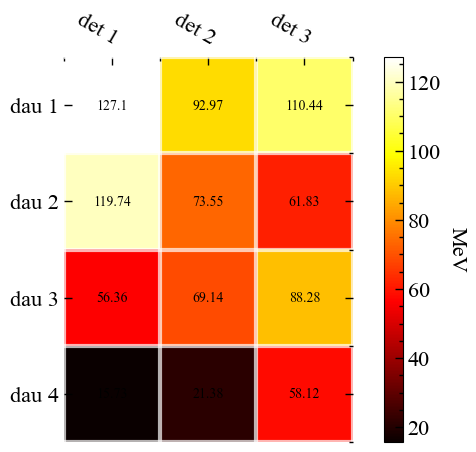

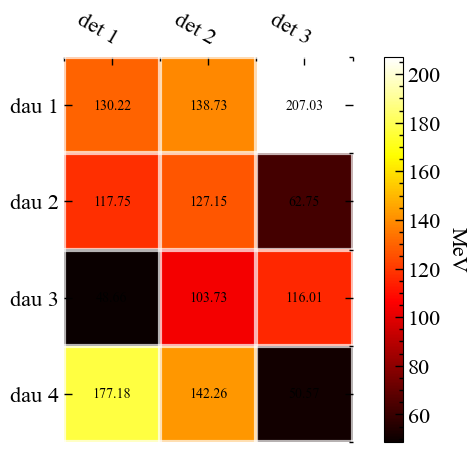

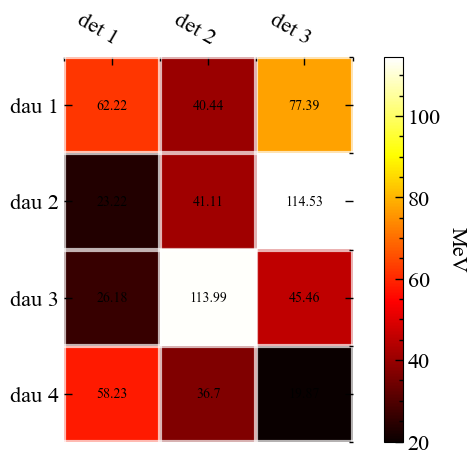

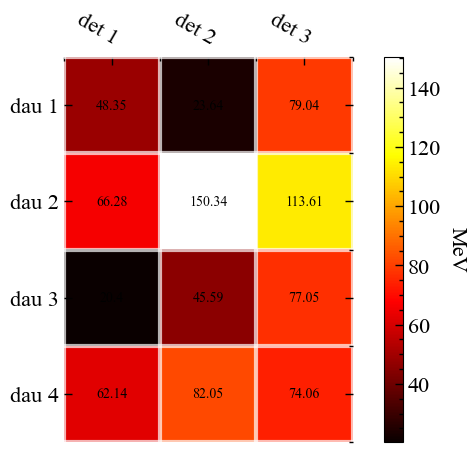

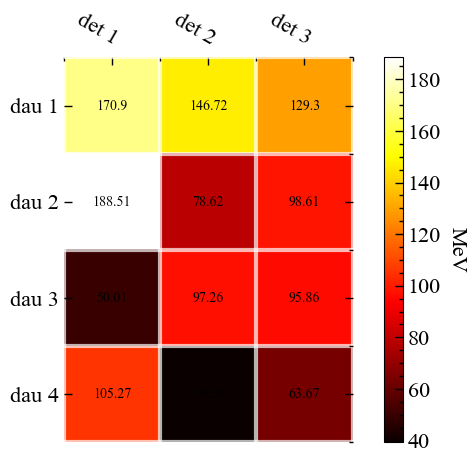

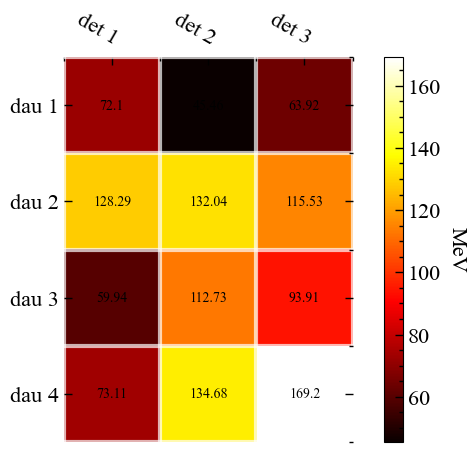

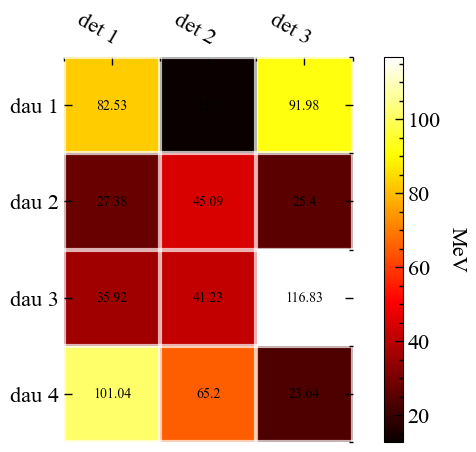

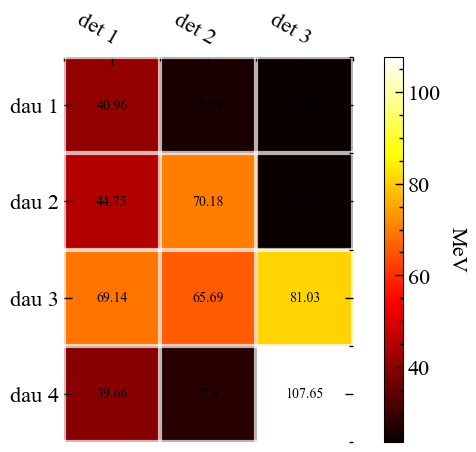

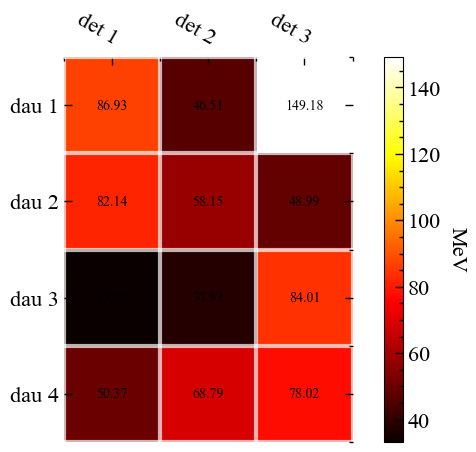

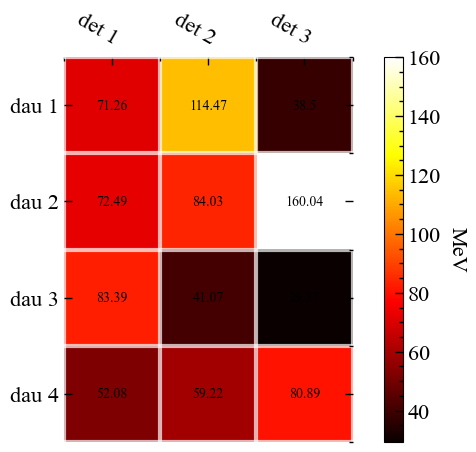

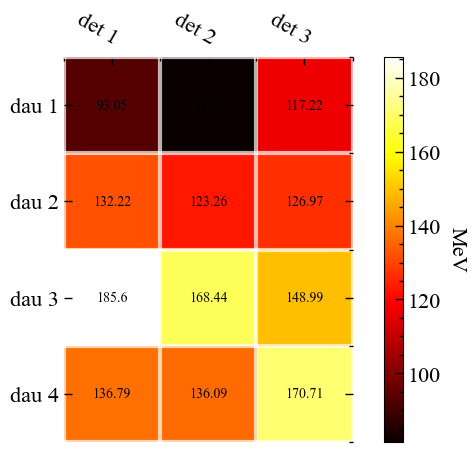

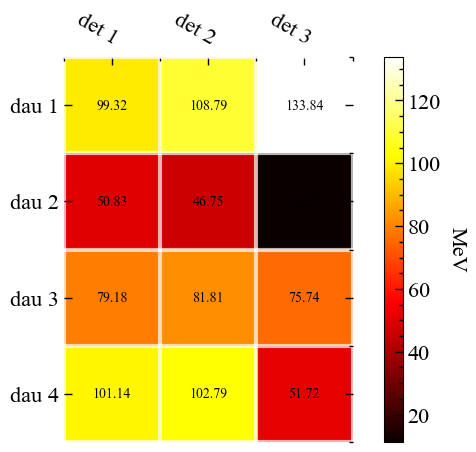

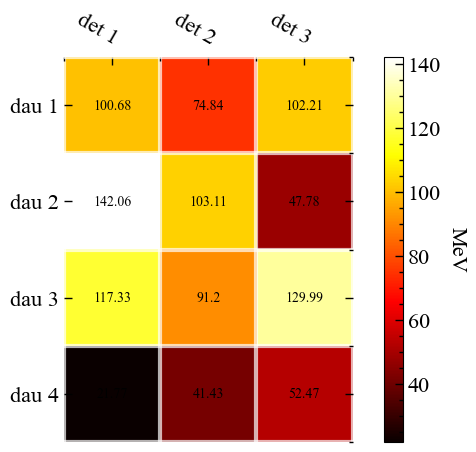

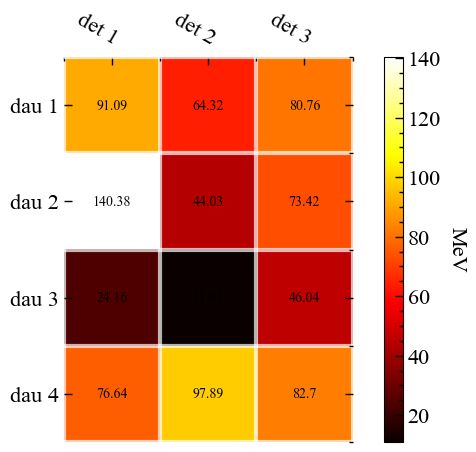

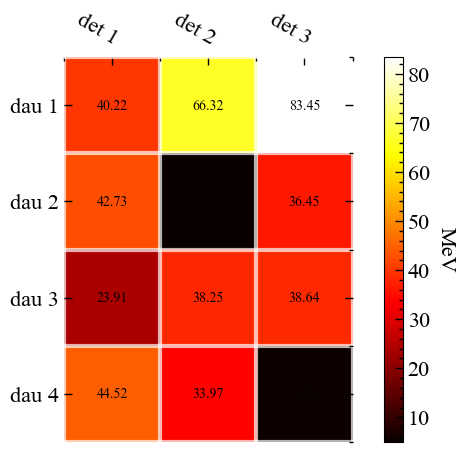

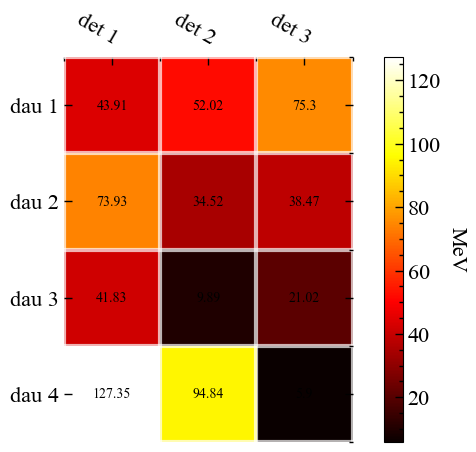

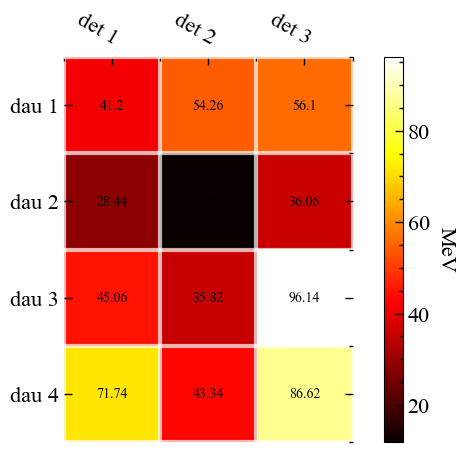

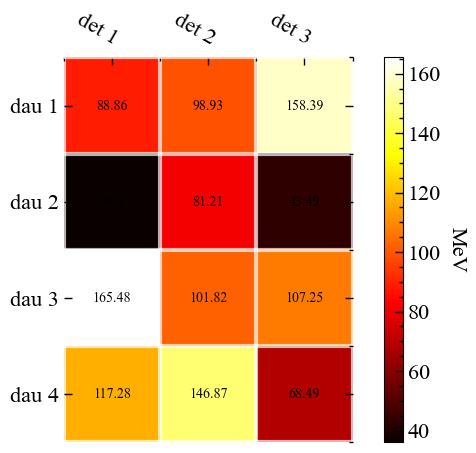

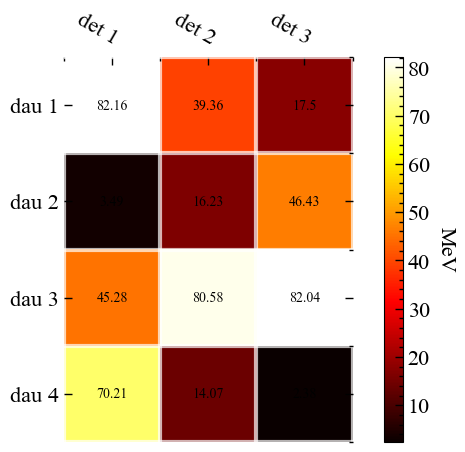

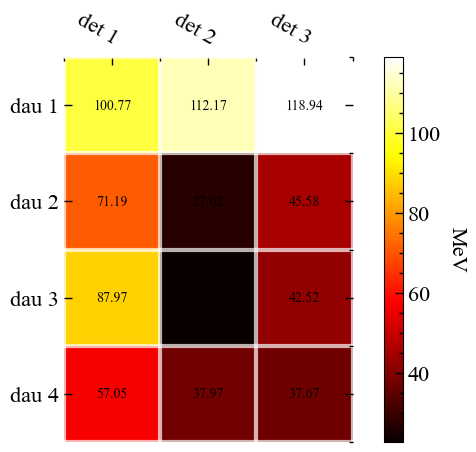

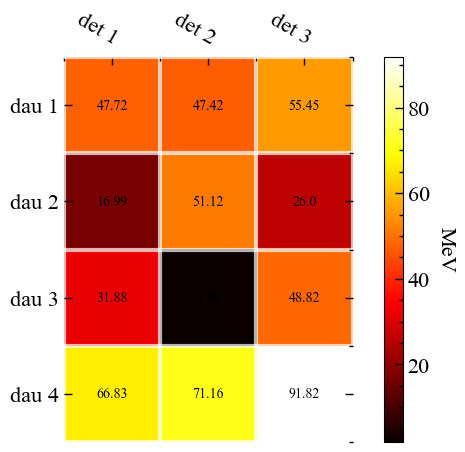

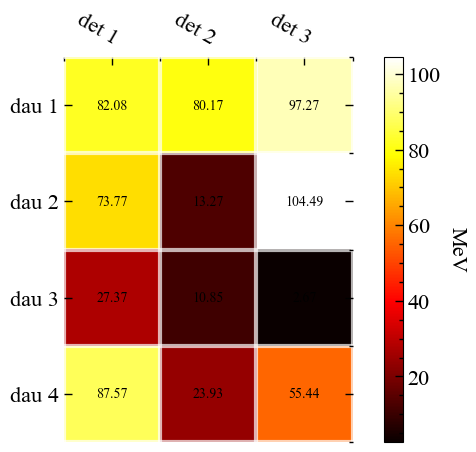

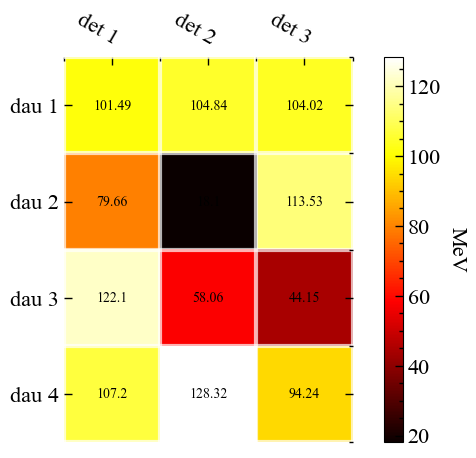

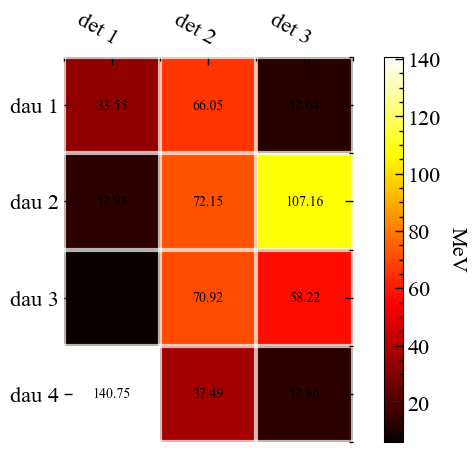

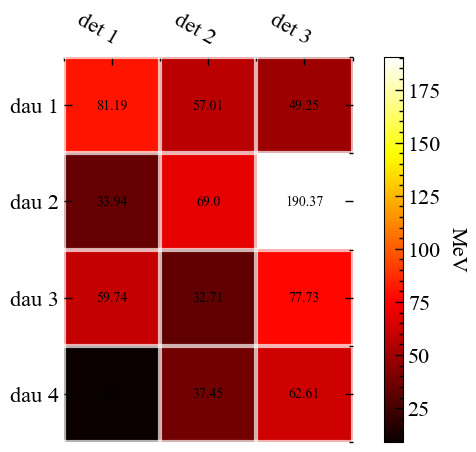

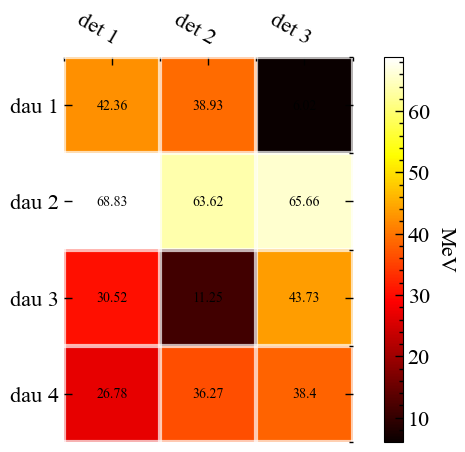

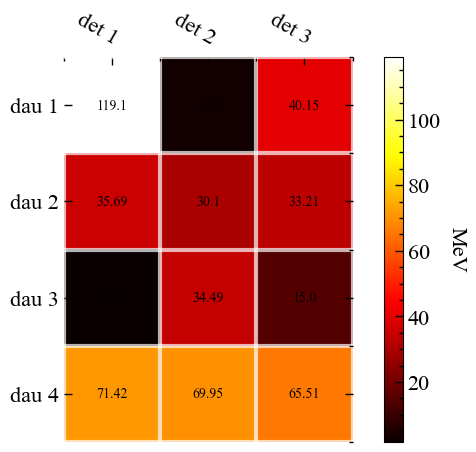

In [213]:
for c in counts_in_bin:
    plot_dist(c)

## Animation
    Showing how the energy in distributed over the 4 detector units

In [11]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
        
    **retrived from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts